In [1]:
from train_pointnet import LitModel1
from dataset.shapenet import ShapeNetPart
from torch.utils.data import DataLoader
from einops import rearrange
import torch
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [119]:
val_data = DataLoader(ShapeNetPart(n_points=2048, partition='test', class_choice=None), batch_size=100, num_workers=4, shuffle=False, pin_memory=True)
val_data_iter = iter(val_data)
x,cls,y = next(val_data_iter)

In [120]:
cmap = plt.get_cmap("hsv")

In [135]:
id2cat = { i: c for c,i in ShapeNetPart.cat2id.items() }
id2cat

{0: 'airplane',
 1: 'bag',
 2: 'cap',
 3: 'car',
 4: 'chair',
 5: 'earphone',
 6: 'guitar',
 7: 'knife',
 8: 'lamp',
 9: 'laptop',
 10: 'motor',
 11: 'mug',
 12: 'pistol',
 13: 'rocket',
 14: 'skateboard',
 15: 'table'}

In [157]:
def plt_shape(ax, i):
    points = x[i]
    parts = ShapeNetPart.cls2parts[cls[i].item()]
    seg = (y[i] - min(*parts)) / len(parts)
    print(cls[i].item(), parts, y[i].unique())
    ax.set_title(id2cat[cls[i].item()])
    ax.scatter(points[:,0], points[:,2], points[:,1], color=cmap(seg), s=10, alpha=1)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    #ax._axis3don = False

15 [47, 48, 49] tensor([47, 48, 49])
0 [0, 1, 2, 3] tensor([0, 1, 2, 3])
4 [12, 13, 14, 15] tensor([12, 13, 14, 15])
12 [38, 39, 40] tensor([38, 39, 40])


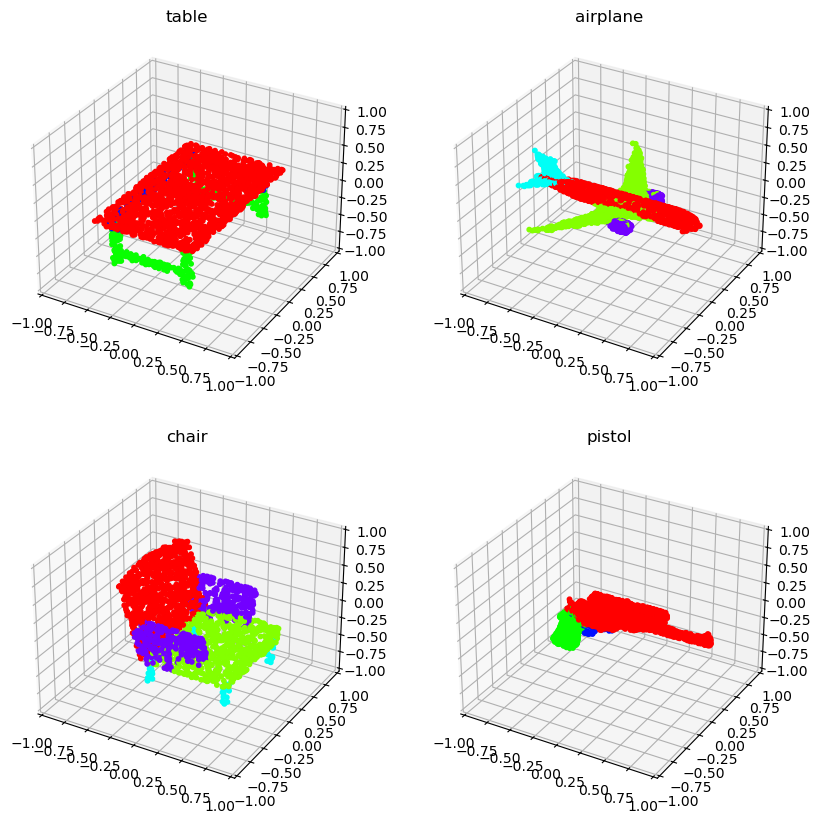

In [158]:
ax = plt.gcf().add_subplot(221, projection='3d')
plt_shape(ax, 1)
ax = plt.gcf().add_subplot(222, projection='3d')
plt_shape(ax, 2)
ax = plt.gcf().add_subplot(223, projection='3d')
plt_shape(ax, 27)
ax = plt.gcf().add_subplot(224, projection='3d')
plt_shape(ax, 78)
plt.rcParams["figure.figsize"] = (10,10)

In [145]:
list(enumerate(cls.tolist()))

[(0, [4]),
 (1, [15]),
 (2, [0]),
 (3, [4]),
 (4, [4]),
 (5, [4]),
 (6, [0]),
 (7, [4]),
 (8, [15]),
 (9, [8]),
 (10, [0]),
 (11, [15]),
 (12, [15]),
 (13, [4]),
 (14, [15]),
 (15, [12]),
 (16, [15]),
 (17, [4]),
 (18, [4]),
 (19, [8]),
 (20, [15]),
 (21, [0]),
 (22, [15]),
 (23, [15]),
 (24, [15]),
 (25, [0]),
 (26, [4]),
 (27, [4]),
 (28, [4]),
 (29, [15]),
 (30, [15]),
 (31, [15]),
 (32, [4]),
 (33, [15]),
 (34, [15]),
 (35, [15]),
 (36, [3]),
 (37, [7]),
 (38, [4]),
 (39, [3]),
 (40, [0]),
 (41, [4]),
 (42, [14]),
 (43, [4]),
 (44, [13]),
 (45, [0]),
 (46, [8]),
 (47, [3]),
 (48, [4]),
 (49, [15]),
 (50, [15]),
 (51, [15]),
 (52, [4]),
 (53, [0]),
 (54, [3]),
 (55, [8]),
 (56, [6]),
 (57, [4]),
 (58, [0]),
 (59, [6]),
 (60, [15]),
 (61, [15]),
 (62, [6]),
 (63, [0]),
 (64, [4]),
 (65, [15]),
 (66, [4]),
 (67, [0]),
 (68, [4]),
 (69, [15]),
 (70, [4]),
 (71, [6]),
 (72, [7]),
 (73, [15]),
 (74, [4]),
 (75, [0]),
 (76, [4]),
 (77, [0]),
 (78, [12]),
 (79, [15]),
 (80, [14]),
 (81, [8